In [28]:
# Make a better system naming things, with doucmentation
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
notebook_dir = os.path.abspath(os.getcwd())
src_path = os.path.join('/home/lerceg/LukaPosao/market_models/', 'src')
sys.path.append(src_path)

import market_models.src.models.predict_model as pm
import market_models.src.utils as utils

In [43]:
data_name = 'netrisk_casco_2023_11_14__2023_11_20__2023_12_12'
target_variable = 'KÖBE_price'
model_name = utils.get_model_name(data_name, target_variable)


data_path = utils.get_processed_data_path(data_name)
features_path = utils.get_features_path(data_name)
model_path = utils.get_model_path(model_name)


data, features = utils.load_data(data_path, features_path, target_variable = target_variable)
model = utils.load_model(model_path)

predictions = utils.predict(model, data[features])
errors = data[target_variable] - predictions
percentage_error = errors / data[target_variable] * 100

In [54]:
def plotHistErrorPercenage(error : np.array) -> None:
    plt.hist(error, range = [error.min() - 1, error.max() + 1], bins=40,
             weights=np.ones(len(error)) / len(error))
    plt.xlabel('Error percentage')
    plt.ylabel('Percent of errors')
    plt.show()


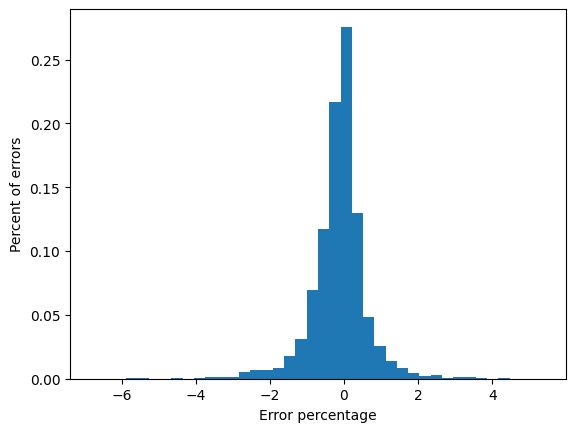

In [55]:
plotHistErrorPercenage(percentage_error)

In [56]:
percentage_error.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 1])

0.00   -5.785437
0.10   -0.914830
0.20   -0.549545
0.30   -0.338017
0.40   -0.191355
0.50   -0.078500
0.60    0.013594
0.70    0.133988
0.80    0.291711
0.90    0.551575
0.99    1.902067
1.00    4.383624
Name: KÖBE_price, dtype: float64

In [41]:
data[target_variable]

0       156948.0
1       232728.0
2       133356.0
3       165864.0
4       176712.0
          ...   
3101    119208.0
3102     80772.0
3103     64932.0
3104     75780.0
3105     75780.0
Name: ALFA_price, Length: 2982, dtype: float64